<a href="https://colab.research.google.com/github/Sanarazaaa/Simulating-Local-Adaptation-in-Two-Environments/blob/main/Simulating_Local_Adaptation_in_Two_Environments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

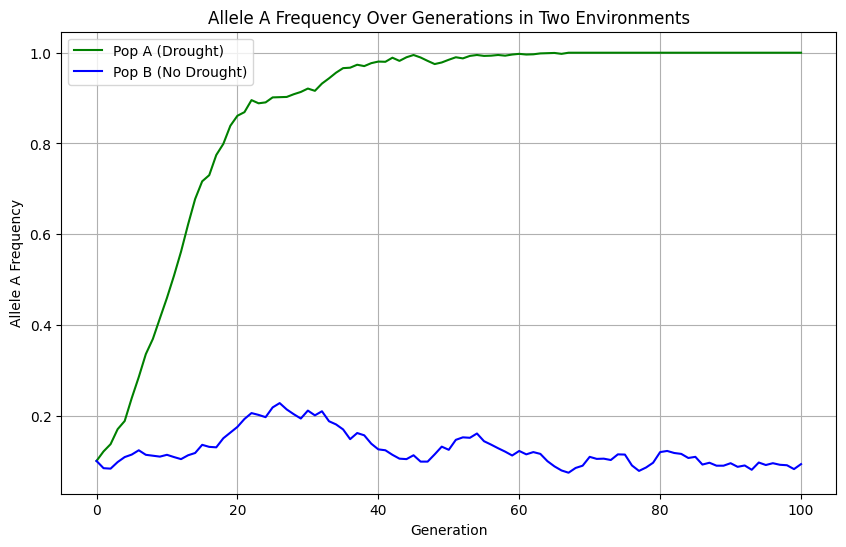

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
POP_SIZE = 1000
GENERATIONS = 100
initial_freq_A = 0.1

# Fitness in each environment
fitness_envs = {
    "drought": {'AA': 1.0, 'Aa': 0.9, 'aa': 0.7},       # Pop A: selection favors A
    "no_drought": {'AA': 1.0, 'Aa': 1.0, 'aa': 1.0}     # Pop B: neutral selection
}

def generate_population(freq_A, size):
    freq_a = 1 - freq_A
    probs = [
        freq_A ** 2,             # AA
        2 * freq_A * freq_a,     # Aa
        freq_a ** 2              # aa
    ]
    return np.random.choice(['AA', 'Aa', 'aa'], size=size, p=probs)

def calculate_allele_freq(population):
    count_A = sum(genotype.count('A') for genotype in population)
    return count_A / (2 * len(population))

def apply_selection(population, fitness):
    weights = [fitness[genotype] for genotype in population]
    total_fitness = sum(weights)
    probs = [w / total_fitness for w in weights]
    selected = np.random.choice(population, size=len(population), p=probs)
    return selected

def simulate_evolution(fitness, label):
    freq_A = initial_freq_A
    allele_freqs = [freq_A]
    population = generate_population(freq_A, POP_SIZE)

    for _ in range(GENERATIONS):
        population = apply_selection(population, fitness)
        population = generate_population(calculate_allele_freq(population), POP_SIZE)
        freq_A = calculate_allele_freq(population)
        allele_freqs.append(freq_A)

    return allele_freqs

# Run simulations
popA_freqs = simulate_evolution(fitness_envs["drought"], "Drought Environment")
popB_freqs = simulate_evolution(fitness_envs["no_drought"], "Neutral Environment")

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(GENERATIONS + 1), popA_freqs, label="Pop A (Drought)", color='green')
plt.plot(range(GENERATIONS + 1), popB_freqs, label="Pop B (No Drought)", color='blue')
plt.title("Allele A Frequency Over Generations in Two Environments")
plt.xlabel("Generation")
plt.ylabel("Allele A Frequency")
plt.legend()
plt.grid(True)
plt.show()